In [1]:
import pandas as pd 
import numpy as np
import requests 
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import datetime

In [2]:
# Function to import data sets (with url)
def get_data(url):
    csv_url = url
    req = requests.get(csv_url)
    url_content = req.content
    csv_file = open('downloaded.csv', 'wb')
    csv_file.write(url_content)
    csv_file.close()
    df = pd.read_csv('downloaded.csv')
    os.remove("downloaded.csv")
    return df

In [3]:
## Export dataset Cases|Deads|Rate weekly
df_cases_deaths_rate = get_data("https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/csv")
#df_cases_deads_l15 = get_data("https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/csv")
#df_sub_nation_rating = get_data("https://opendata.ecdc.europa.eu/covid19/subnationalcasedaily/csv")
#df_hospital_rating = get_data("https://opendata.ecdc.europa.eu/covid19/hospitalicuadmissionrates/csv/data.csv")
#df_testing = get_data("https://opendata.ecdc.europa.eu/covid19/testing/csv")
#df_age = get_data("https://opendata.ecdc.europa.eu/covid19/agecasesnational/csv")
#df_vacine = get_data("https://opendata.ecdc.europa.eu/covid19/vaccine_tracker/csv/data.csv")
#df_indicators = get_data("https://opendata.ecdc.europa.eu/covid19/movementindicators/csv/data.csv")


#Delete Columns 
df_cases_deaths_rate = df_cases_deaths_rate.drop(['source'], axis=1)
#Filter Dataset Cases
df_cases = df_cases_deaths_rate[df_cases_deaths_rate['indicator']=='cases']
#Filter Dataset Deaths
df_deaths = df_cases_deaths_rate[df_cases_deaths_rate['indicator']=='deaths']


## add features to df_cases

# add weekly values
 df_deaths['weekly_count']=df_deaths['cumulative_count'] - df_deaths['cumulative_count'].shift(1)



#rate_14_day -> 14-day notification rate of reported COVID-19 cases per 100000 population 
#OR 14-day notification rate of reported deaths per 1 000 000 population


In [4]:
# df_deaths

# add full data columns
full_Date = df_deaths['year_week'].to_string(index = False, dtype="string").split('\n')
del(full_Date[-1])
df_deaths['full_date'] = full_Date
df_deaths['full_date'] = pd.to_datetime(df_deaths['full_date'] + '-1', format = '%Y-%W-%w')

<ipython-input-4-58940b2b84fa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deaths['full_date'] = full_Date
<ipython-input-4-58940b2b84fa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deaths['full_date'] = pd.to_datetime(df_deaths['full_date'] + '-1', format = '%Y-%W-%w')


In [5]:
#df_cases

# add full data columns
full_Date = df_cases['year_week'].to_string(index = False, dtype="string").split('\n')
del(full_Date[-1])
df_cases['full_date'] = full_Date
df_cases['full_date'] = pd.to_datetime(df_cases['full_date'] + '-1', format = '%Y-%W-%w')


<ipython-input-5-ae6d399f316b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cases['full_date'] = full_Date
<ipython-input-5-ae6d399f316b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cases['full_date'] = pd.to_datetime(df_cases['full_date'] + '-1', format = '%Y-%W-%w')


In [19]:
# Gráfico para analisar número de mortes/cases

#mostrar ao longo do tempo, (definido na função)

def get_cumulative(i_country, type):
    if type == 'cases':
        country_df = df_cases[df_cases['country']==i_country]
        plt.plot(country_df['full_date'],country_df['cumulative_count'])
        plt.title("Cumulative " + type + " on " + i_country)
    if type == 'deaths':
        country_df = df_deaths[df_deaths['country']==i_country]
        plt.plot(country_df['full_date'],country_df['cumulative_count'])
        plt.title("Cumulative " + type + " on " + i_country)
    

def get_14_day_rate(i_country, type):
    if type == 'deaths':
        country_df = df_deaths[df_deaths['country']==i_country]
        plt.plot(country_df['full_date'],country_df['rate_14_day'])
        plt.title("14 Day Rate " + type + " on " + i_country)
    if type == 'cases':
        country_df = df_cases[df_cases['country']==i_country]
        plt.plot(country_df['full_date'],country_df['rate_14_day'])
        plt.title("14 Day Rate " + type + " on " + i_country)
        
def get_daily(i_country, type):
    if type == 'deaths':
        country_df = df_deaths[df_deaths['country']==i_country]
        plt.plot(country_df['full_date'],country_df['weekly_count'])
        plt.title("Daily " + type + " on " + i_country)
    if type == 'cases':
        country_df = df_cases[df_cases['country']==i_country]
        plt.plot(country_df['full_date'],country_df['weekly_count'])
        plt.title("Daily " + type + " on " + i_country)



In [ ]:
# funções para conseguir sitaução atual:

# top casos/mortes semanal

# maior variação - semana anterior

# top vacinação - semana

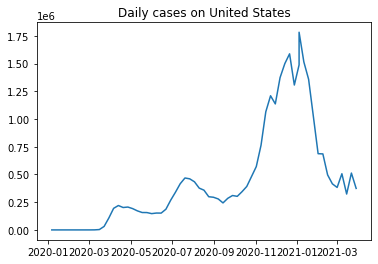

In [28]:
### testes
get_daily('United States', 'cases')


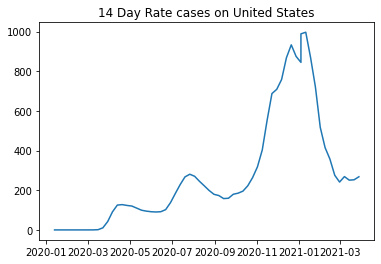

In [27]:
get_14_day_rate('United States', 'cases')
